In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [2]:
#Test ve Train Verisetini Tanımlama

#Test verisetini pandas kütüphanesi ile tanımlıyoruz.
train_dataset = pd.read_csv(r'C:\Users\pesen\Desktop\new\train.csv') 

#Eğitim verisetini pandas kütüphanesi ile tanımlıyoruz.
test_dataset = pd.read_csv(r'C:\Users\pesen\Desktop\new\test.csv')

In [3]:
train_dataset.info()
test_dataset.info()

train_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#Sütunları kontrol ediyoruz.

print(train_dataset.columns )
print(test_dataset.columns)

#Sütun ve Satırları Train ve Test için yazdır
print('\ntrain dataset: %s, test dataset %s' %(str(train_dataset.shape), str(test_dataset.shape)) )

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

train dataset: (891, 12), test dataset (418, 11)


In [5]:
#İki veri setindeki toplam yolcu sayısı
print(train_dataset.shape[0] + test_dataset.shape[0])

1309


In [6]:
#Hayatta kalma oranı
train_dataset['Survived'].mean()

0.3838383838383838

In [7]:

#Ilk 5 veriyi tablo şeklinde göster
train_dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Sex
print('Number of male passengers: ', len(train_dataset.groupby('Sex').groups['male']))   #gruplandır
print('Number of female passengers: ', len(train_dataset.groupby('Sex').groups['female']))


Number of male passengers:  577
Number of female passengers:  314


In [9]:
#Eksik sütünları göster

#eğitim setinde eksik değerleri olan sütunları listele
print(train_dataset.columns[train_dataset.isna().any()])

#Eksiklik verileri şu şekilde de gösterebiliriz
print("Missings in the train data: ")
display(train_dataset.isnull().sum())

print("Missings in the test data: ") 
display(test_dataset.isnull().sum())

Index(['Age', 'Cabin', 'Embarked'], dtype='object')
Missings in the train data: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missings in the test data: 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#train ve test data setini pandas kütüphanesinin concat metoduyla birleştiren fonksyon

def concat_df(train_dataset,test_dataset):
    return pd.concat([train_dataset, test_dataset], sort= True).reset_index(drop=True)

In [11]:
#Eğitim verilerinde yaş, kabin ve başlangıçlar sütununda eksiklerimiz var.
#Test veri setinde yaş, ücret ve kabin sütununda eksiklikler var. 
#Her iki veri setini birleştireceğiz ve tüm veri seti için veri temizliğini gerçekleştireceğiz.
#train ve test 

df_all = concat_df(train_dataset , test_dataset)


In [12]:
#YAŞ

#yaş sütünumuzun yüzdelik olarak ne kadar eksik verisi olduğunu görmek için
print("Missings for Age in the entire data set: " + str(df_all['Age'].isnull().sum()))
print("Missings in percentage: " + str(round(df_all['Age'].isnull().sum()/len(df_all)*100,0)))

#yaş veri setimizin içinde değerlendirmeye devam ediyoruz
      
print('Median for Age seperated by Pclass: ')    
display(train_dataset.groupby('Pclass')['Age'].median())      
print('Median for Age seperated by Pclass and Sex:')    
display(train_dataset.groupby(['Pclass','Sex'])['Age'].median()) 
print('Number of cases:')    
display(train_dataset.groupby(['Pclass','Sex'])['Age'].count()) 
      
#replace the missings values with the medians of each group
df_all['Age']= df_all.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))


Missings for Age in the entire data set: 263
Missings in percentage: 20.0
Median for Age seperated by Pclass: 


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Median for Age seperated by Pclass and Sex:


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Number of cases:


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

In [13]:
#ücretlere bakıyoruz şimdi de      
df_all.loc[df_all['Fare'].isnull()]   
      
#Tüm veri setinde tek bir eksik ücret değerimiz var. Bay Thomas      
      
#loc cases which are similar to Mr.Thomas and use the median of fare to replace  the missing for his data set
      
mr_thomas=df_all.loc[(df_all['Pclass']==3)&(df_all['SibSp']==0)&(df_all['Embarked']=='S')]['Fare'].median()
print(mr_thomas)
      


7.925


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

There are 147 different values for Cabin and 687 cases are missing.


M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

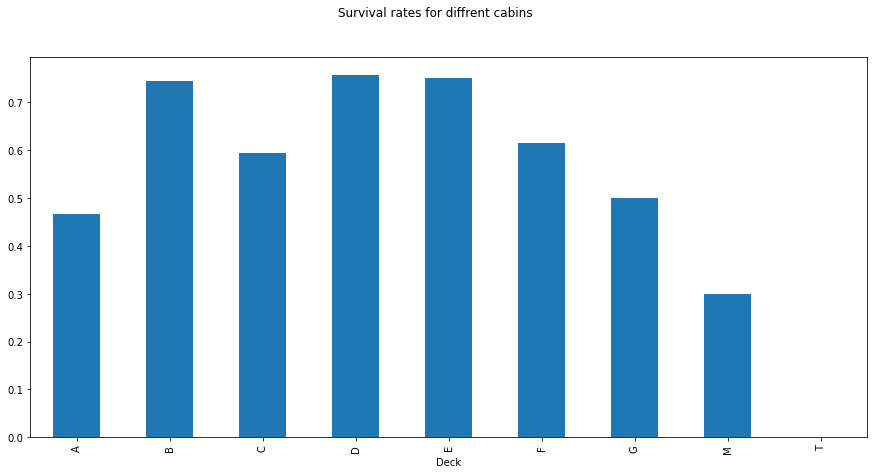

In [14]:
#kabine bakıyoruz belki de önemli bir belirleyici olabilir.
      
display(train_dataset['Cabin'].unique())
print("There are "+ str(train_dataset['Cabin'].nunique()) + " different values for Cabin and " + str(train_dataset['Cabin'].isnull().sum()) + " cases are missing.")

#keep all first letters of cabin in a new variable and use "M" for each missing
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M' )
      
df_all[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar',figsize=(15,7))
plt.suptitle('Survival rates for diffrent cabins')
      
#------------------------------------------------------------------------------------------------------------      
      
#Hayatta kalma oranlarında önemli farklılıklar var çünkü üst güvertelerdeki konuklar filikalarda daha hızlıydı.
#Bazı desteleri gruplayacağız.      
      
      
idx=df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx,'Deck'] = 'A'   
df_all['Deck']= df_all['Deck'].replace(['A','B','C'],'ABC')
df_all['Deck']= df_all['Deck'].replace(['D','E'],'DE')
df_all['Deck']= df_all['Deck'].replace(['F','G'],'FG')      
df_all['Deck'].value_counts()

In [15]:
#gemiye bindiler
      
df_all.loc[df_all['Embarked'].isnull()]
     
#------------------------------------------------------------------------------------------------------
      
df_all.loc[(df_all['Pclass'] == 1) & (df_all['Fare'] <= 80) & (df_all ['Deck'] == 'ABC')]['Embarked'].value_counts()

#Başlamak için sadece iki eksik var.
#Ücret davası için zaten denediğimiz gibi, eksik değeri değiştirmek için benzer durumlara bakabiliriz.
      
df_all.loc[df_all['Embarked'].isnull(),'Embarked'] = 'S'
     
#------------------------------------------------------------------------------------------------------
      
print("Missing in the data:")
display(df_all.isnull().sum())

Missing in the data:


Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64

For age, each category has a different number of cases:
For fare, each category has a different number of cases:


Text(0.5, 0.98, 'Survival rates for fare categories')

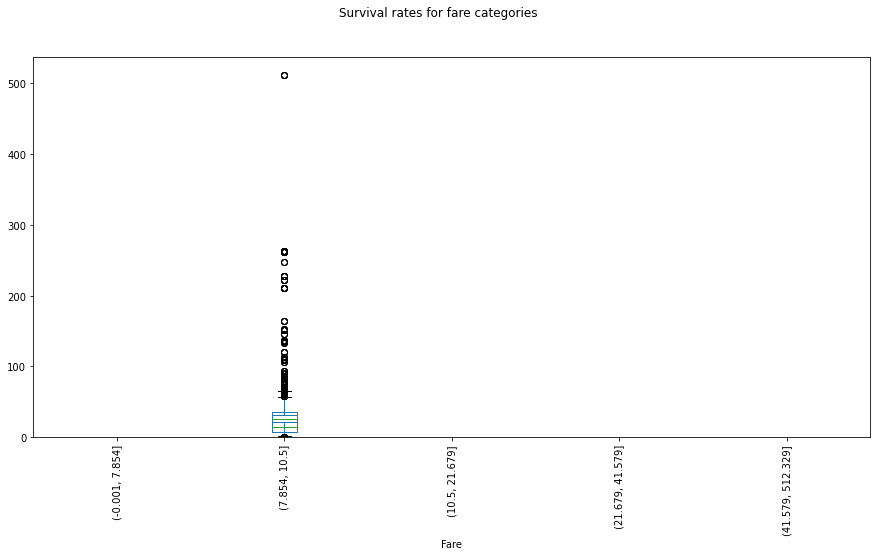

In [16]:
df_all.boxplot(column=['Fare'], figsize=(15,7))

df_all.boxplot(column=['Age'], figsize=(15,7))
      
#------------------------------------------------------------------------------------------------------
      
df_all['Fare'] = pd.qcut(df_all['Fare'], 5 )
df_all['Age'] = pd.cut(df_all['Age'].astype(int), 5 )

print("For age, each category has a different number of cases:")
df_all['Age'].value_counts()
      
print("For fare, each category has a different number of cases:")
df_all['Fare'].value_counts()

df_all[['Age', 'Survived']].groupby('Age')['Survived'].mean()

df_all[['Fare', 'Survived']].groupby('Fare')['Survived'].mean()      

df_all[['Age', 'Survived']].groupby('Age')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.suptitle('Survival rates for age categories')      
 
df_all[['Fare', 'Survived']].groupby('Fare')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.suptitle('Survival rates for fare categories')         
  

Text(0.5, 0.98, 'Survival rates for family size categories')

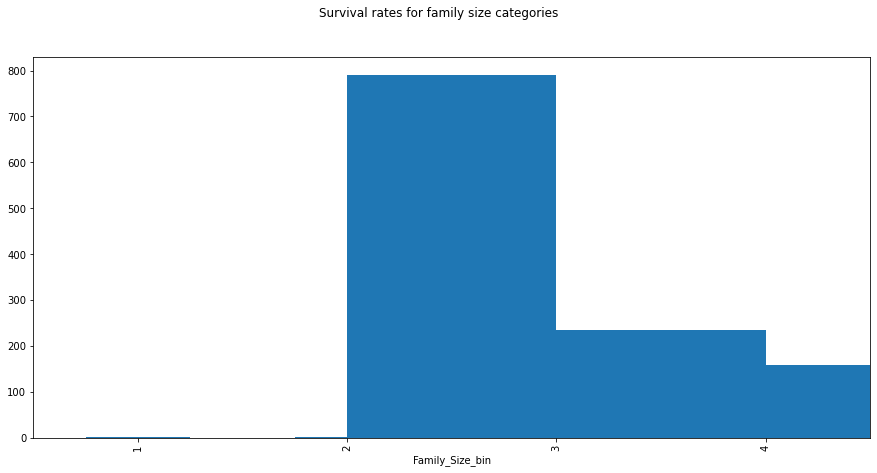

In [17]:
#AİLE

#Veri setimizde bize aile büyüklüğü hakkında bir şeyler söyleyen iki ilginç değişken var. 
#SibSp, bir yolcunun kaç tane kardeşi ve eşi olduğunu tanımlar ve kaç tane ebeveyn ve çocuk parch. 
#Bu değişkenleri özetleyebilir ve aile boyutunu elde etmek için 1 ekleyebiliriz (her yoldan geçen için).     
      
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
df_all['Family_Size'].hist(figsize=(15,7))
      
df_all['Family_Size_bin']=df_all['Family_Size'].map(lambda s: 1 if s == 1 else (2 if s == 2 else (3 if 3 <= s <= 4 else (4 if s >= 5 else 0))))

df_all['Family_Size_bin'].value_counts()

#Bir tez, ailelerin hayatta kalma şansının bekarlara göre daha yüksek olduğu, çünkü kendilerini daha iyi destekleyebildikleri ve öncelikli olarak kurtarıldıklarıdır.
# Bununla birlikte, aileler çok büyükse, istisnai bir durumda koordinasyon muhtemelen çok zor olacaktır.

df_all[['Family_Size_bin','Survived']].groupby('Family_Size_bin')['Survived'].mean().plot(kind='bar' , figsize=(15,7))
plt.suptitle('Survival rates for family size categories')


In [18]:
#biletler
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

#Bilet sıklıkları ile hayatta kalma oranları arasında bir korelasyon bekliyoruz, çünkü aynı bilet numaraları, insanların birlikte seyahat ettiklerinin bir göstergesi.
df_all[['Ticket_Frequency','Survived']].groupby('Ticket_Frequency').mean()


,Survived
Ticket_Frequency,
1,0.270270
2,0.513812
3,0.653465
4,0.727273
5,0.333333
6,0.210526
7,0.208333
8,0.384615
11,0.000000


C:\Users\pesen\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Survival rates grouped by families of women in dataset:


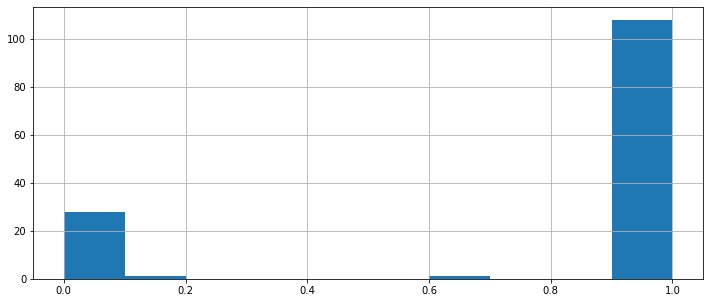

In [19]:
#İSİM

#İsim bize bir yolcunun sosyoekonomik durumu hakkında çok önemli bilgiler veriyor. 
#Birinin evli olup olmadığı veya daha yüksek bir sosyal statünün göstergesi olabilecek resmi bir unvanı olup olmadığı sorusuna cevap verebiliriz.

df_all['Title'] = df_all['Name'].str.split(',', expand=True)[1].str.split('.',expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] =1
df_all['Title'].nunique()
#Veri setimizde pek çok farklı başlık var.
# Yalnızca 10'dan fazla davaya sahip başlığı dikkate alıyoruz, diğerlerinin tümünü "misc" kategorisine atayacağız.
title_names = (df_all['Title'].value_counts() < 10)
df_all['Title'] = df_all['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
df_all.groupby('Title')['Title'].count()

#Yolcuların soyadlarını belirleyeceğiz. 
#Daha sonra hem eğitimde hem de test veri setinde bulunan herhangi bir aile üyesi olup olmadığını görebiliriz.
import string

def extract_surname(data):
    families=[]
    for i in range(len(data)):
        name = data.iloc[i]
        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name
        family = name_no_bracket.split(',')[0] 
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        for c in string.punctuation:
            family = family.replace(c, '').strip()
        families.append(family)
        
    return families
df_all['Family'] = extract_surname(df_all['Name'])

df_all['Family'].nunique()

#Yüksek lisans derecesine sahip kişiler ve kadınlar, önemli ölçüde daha sık hayatta kaldılar ve aynı zamanda ortalama olarak daha büyük ailelere sahipler. 
#Eğitim veri setinde bir usta veya kadın hayatta kalan olarak işaretlenirse, test veri setindeki aile üyelerinin de hayatta kalacağını varsayıyoruz.
      
df_all[['Title','Survived','Family_Size']].groupby('Title').mean()

print('Survival rates grouped by families of women in dataset:')
df_all.loc[(df_all['Sex'] == 'female') & (df_all['Family_Size'] > 1)].groupby('Family')['Survived'].mean().hist(figsize=(12,5))

#Aile büyüklüğü 2 veya daha fazla olan kadınlarda, çoğu zaman hepsi veya hiçbiri ölmez.

master_families = df_all.loc[df_all['Title'] == 'Master']['Family'].tolist()
df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean().hist(figsize=(12,5))

#Aynısı, unvanında kaptan olan yolcu aileleri için de geçerlidir.

women_rate = df_all.loc[(df_all['Sex'] == 'female') & (df_all['Family_Size'] > 1 )].groupby('Family')['Survived'].mean()
master_rate = df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean()

combined_rate = women_rate.append(master_rate)

combined_rate_df = combined_rate.to_frame().reset_index().rename(columns={'Survived' : 'Survival_quota'}).drop_duplicates(subset='Family')

df_all =pd.merge(df_all,combined_rate_df ,how = 'left')
                                                                            
                                                                            
                                                                            
df_all['Survival_quota_NA'] = 1
df_all.loc[df_all['Survival_quota'].isnull(), 'Survival_quota_NA']=0                                                                            
df_all['Survival_quota']=df_all['Survival_quota'].fillna(0)                   

In [20]:
cikarilacaklar = ['Name','Ticket','Cabin'] #datamızı incelediğimizde bazı sütünlerin bizim verimiz için gerekli olmadığını fark edip çıkartık.
train_dataset = train_dataset.drop(cikarilacaklar,axis=1)

train_dataset = train_dataset.dropna() #bazı eksik verileri temizledik.

train_dataset.info()

yolcular = []
sutunlar = ['Pclass','Sex','Embarked']  #Pclass:yolcu sınıfı,Embarked:biniş noktası
for sutun in sutunlar:
    yolcular.append(pd.get_dummies(train_dataset[sutun])) #kategorik verileri yer tutucu ile değiştirmek için get_dummies kullandık.

yolcular = pd.concat(yolcular, axis=1) #Dataframe elde etmek için concat methodu kullandık.
print(yolcular)

yolcular = yolcular.drop(['female'], axis=1)
train_dataset = pd.concat((train_dataset,yolcular),axis=1)
train_dataset = train_dataset.drop(['Pclass','Sex','Embarked'],axis=1)

print(train_dataset)

#---------------------------------------------------------------------------------------
X = train_dataset.values
Y = train_dataset['Survived'].values

X = np.delete(X,1,axis=1)

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.3, random_state=0) #test size 30 atadık train test de 70 oldu

siniflama = tree.DecisionTreeClassifier(max_depth=5)
siniflama.fit(X_train,y_train)
skor = siniflama.score(X_test,y_test)

print("Başarı: ",skor)

tahminler = siniflama.predict(X)
as_egitim = accuracy_score(tahminler, Y)

print("Doğruluk tablosu skoru: ", as_egitim)
#Yukarıda uygulamanın doğruluk skorunu elde ettik ancak, doğruluk skoru tek başına bir başarı ölçme kriteri olamaz.
#Diğer kriterlere (hata oranı, hassasiyet vb.) bakabilmek için confusion matrix kullandık. 
#Bunun için pandas kütüphanesinden crosstab() metodu kullandık.

confusion_matrix = pd.crosstab(Y, tahminler, rownames=['Gerçek'], colnames=['Tahmin'])
print (confusion_matrix)

#---------------------------------------------------------------------------------------
#Modelleme ve tahmin
                     
X = train_dataset.values
y = train_dataset['Survived'].values

X = np.delete(X,1,axis=1)
            
#X_test = StandardScaler().fit_transform(test_dataset)       
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state =42) 
model = RandomForestClassifier(criterion = 'gini',n_estimators=1750,max_depth=7,min_samples_split =6, min_samples_leaf = 6, max_features = 'auto', oob_score= True, random_state=42, n_jobs=-1,verbose =1)
            
model.fit(X_train, y_train)
predictions = model.predict(X_test)  

başarı = model.score(X_test, y_test)

print(başarı)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB
     1  2  3  female  male  C  Q  S
0    0  0  1       0     1  0  0  1
1    1  0  0       1     0  1  0  0
2    0  0  1       1     0  0  0  1
3    1  0  0       1     0  0  0  1
4    0  0  1       0     1  0  0  1
..  .. .. ..     ...   ... .. .. ..
885  0  0  1       1     0  0  1  0
886  0  1  0       0     1  0  0  1
887  1  0  0       1     0  0  0  1
889  1  0  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

0.7921348314606742


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.2s finished
